<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [30]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



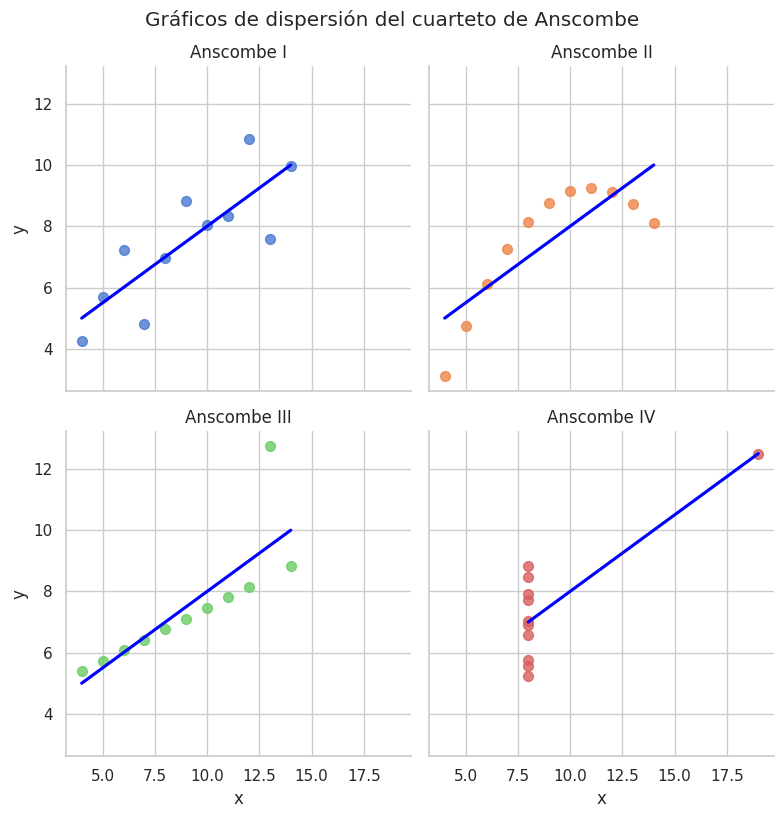

In [31]:
sns.lmplot(data=data, x="x", y="y", col="dataset", hue="dataset",
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 0.8}, line_kws={"color": "blue"}).set_titles("Anscombe {col_name}")
plt.suptitle("Gráficos de dispersión del cuarteto de Anscombe", y=1.02)
plt.show()

Si podemos identificar diferencias significativas entre los grupos obervando los graficos, en particular en la dispersion de sus datos, los patrones de estos mismo y la presenciua de outliers.
En el grafico Anscombre I podemos ver que hay una dispersion evidente de los datos, algo que no ocurre en los graficos de Anscombe II,III y IV. Otra caracteristica que los diferencia es el patron que siguen sus datos, por ejemplo, en el grafico de Anscombre II los datos siguen un patron similar a la forma de una parabola, mientras que en el grafico de Anscombre IV los datos estan alineados verticalmente. Finalmente, tambien podemos observar que en los graficos de Anscombre III y IV hay presencia de outliers, mientras que en los graficos Anscombre I y II no hay.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [32]:
resumen = data.groupby("dataset").describe()
print(resumen)

            x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50  


Lo primero que podemos observar es que los 4 grupos poseen estadisticas iguales entre si, las cuales son; La cantidad de datos (11), el promedio de x (9.0) y de y (7.500909) y la desviacion estandar de x (3.316625). La desviacion estandar de y en los 4 grupos es similar pero no identica.
Ahora, dentro de sus diferencias podemos observar que en el  grupo IV x va de 8.0 a 19.0 como valor maximo, a diferencia de los grupos I,II y III que x va de 4.0 a 14.0 como maximo.
En el caso de los valores de y, se observan diferencias mas significativas en todos los grupos, las cuales si las analizamos con la distribucion de los cuartiles explican diferencias en sus respectivas distribuciones, por ejemplo, si vemos el rango de valores de y en el grupo I y II y lo comparamos con el tercer cuartil nos damos cuenta que en general describen una distribuciuon homogenea (diferencia pequeña entre el tercer cuartil y el maximo). Mientras que en los grupos III y IV podemos observar una diferencia mayor entre el tercer cuartil y el valor maximo de y, lo cual explica la presencia de outliers y describe una distribucion asimetrica.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



Grupo I:
  Coeficiente (pendiente): 0.500
  Intercepto: 3.000
  MSE: 1.251
  R²: 0.667



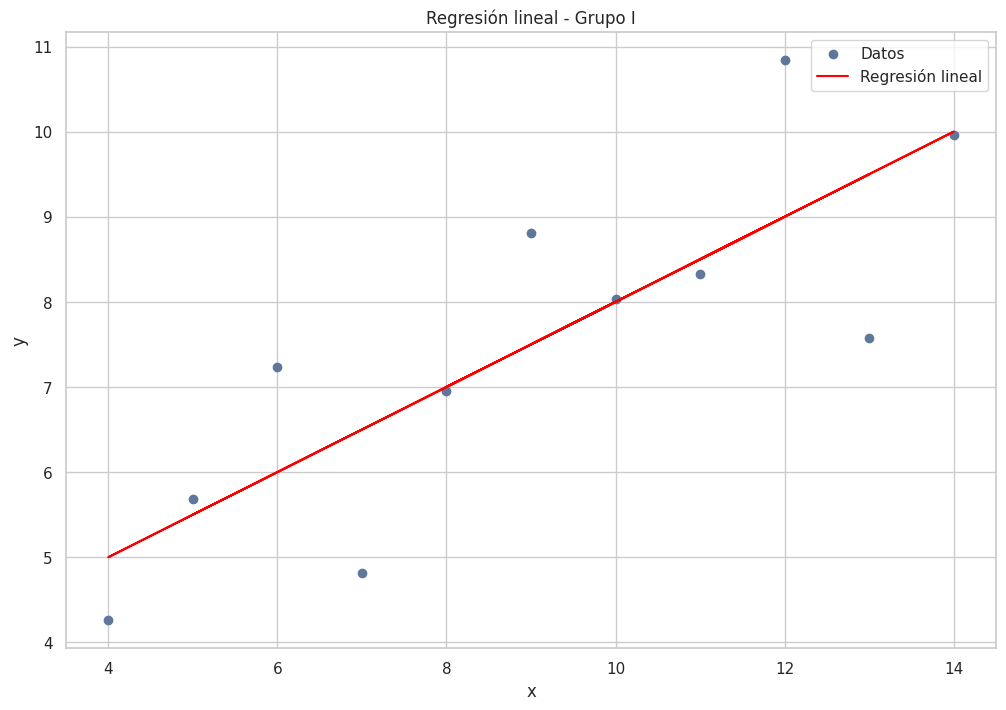

Grupo II:
  Coeficiente (pendiente): 0.500
  Intercepto: 3.001
  MSE: 1.252
  R²: 0.666



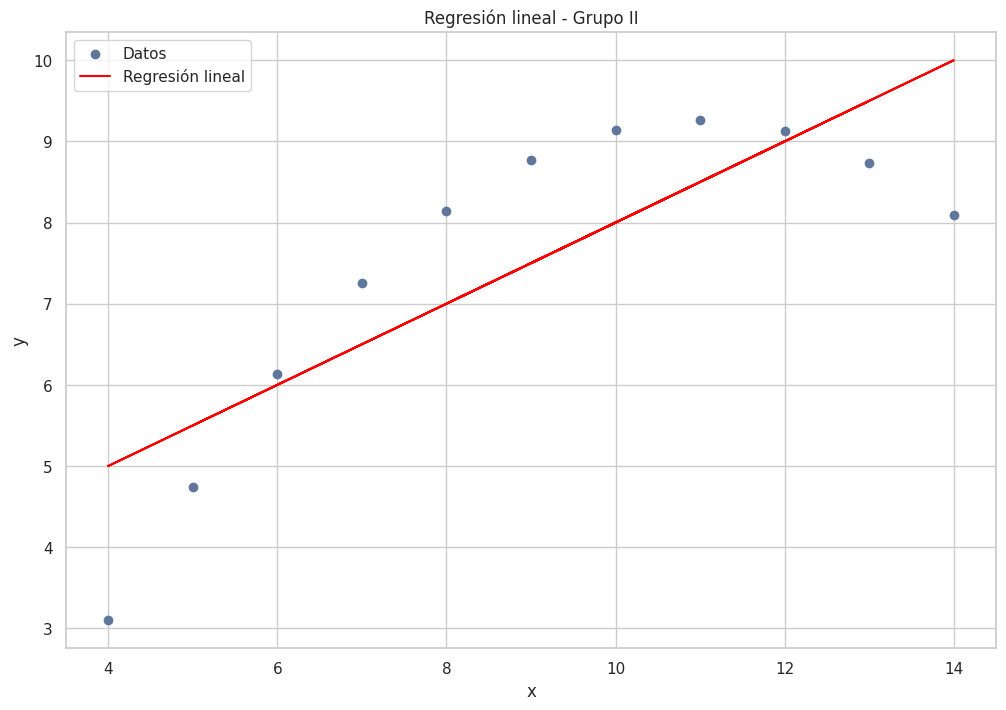

Grupo III:
  Coeficiente (pendiente): 0.500
  Intercepto: 3.002
  MSE: 1.251
  R²: 0.666



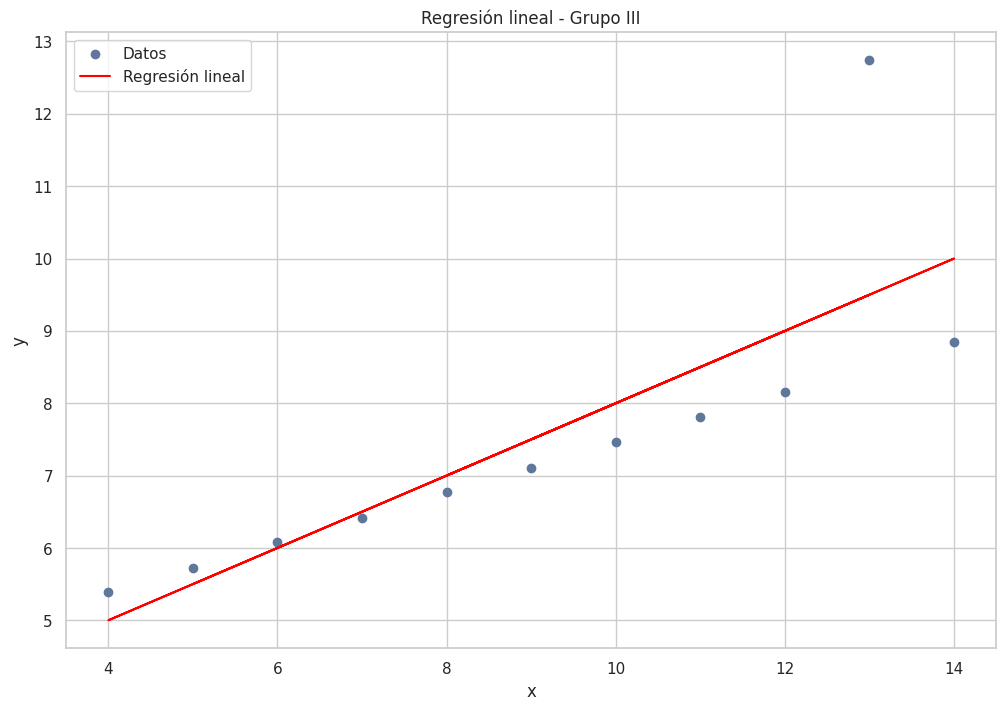

Grupo IV:
  Coeficiente (pendiente): 0.500
  Intercepto: 3.002
  MSE: 1.249
  R²: 0.667



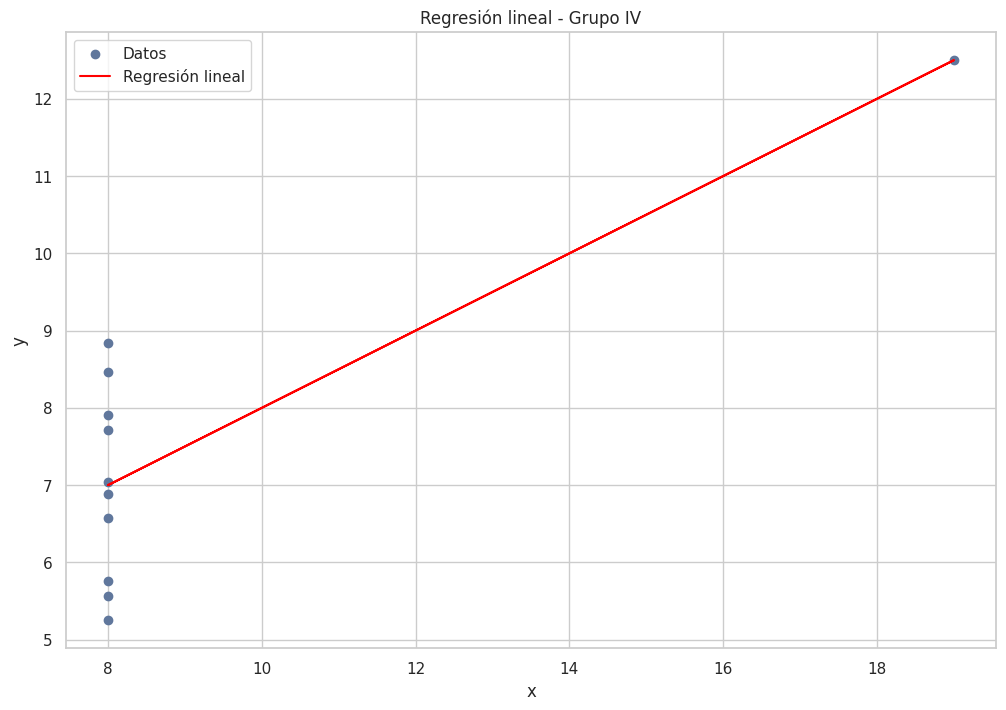

In [33]:
for group, df_group in data.groupby("dataset"):
    X = df_group[["x"]]
    y = df_group["y"]

    modelo = LinearRegression()
    modelo.fit(X, y)

    y_pred = modelo.predict(X)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Grupo {group}:")
    print(f"  Coeficiente (pendiente): {modelo.coef_[0]:.3f}")
    print(f"  Intercepto: {modelo.intercept_:.3f}")
    print(f"  MSE: {mse:.3f}")
    print(f"  R²: {r2:.3f}\n")


    plt.scatter(X, y, label="Datos")
    plt.plot(X, y_pred, color="red", label="Regresión lineal")
    plt.title(f"Regresión lineal - Grupo {group}")
    plt.xlabel("x"); plt.ylabel("y")
    plt.legend()
    plt.show()

Si bien el R^2 de los 4 graficos es aproximadamente 0.67, este puede indicar un buen ajuste lineal, pero observando los graficos podemos notar que no todos los grupos tienen un buen ajuste lineal.
En el grupo I la recta se ajusta de buena manera a los puntos, por lo que la regresion lineal es adecuada para este grupo.
Para el grupo II, dado que los puntos forman una curva, la recta no se ajusta de manera adecuada a los puntos, por lo que el ajuste lineal no es adecuado.
Para el grupo III dado que presenta un outlier muy alto pierde validez el ajuste lineal.
Y para el grupo IV si bien tambien presenta un outlier alto, ademas los puntos en general estan en el mismo valor de x, por lo que no presenta variacion de x, lo cual nos indica que la regresion lineal no funciona (pendiente indefinida)

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

Grupo II — Polinomial grado 2
Coeficientes: [ 2.78083916 -0.12671329] Intercepto: -5.995734265734267
MSE: 2.034329307056634e-06 R²: 0.999999457857722


/tmp/ipython-input-963561730.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx = np.linspace(X.min()[0], X.max()[0], 200).reshape(-1,1)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


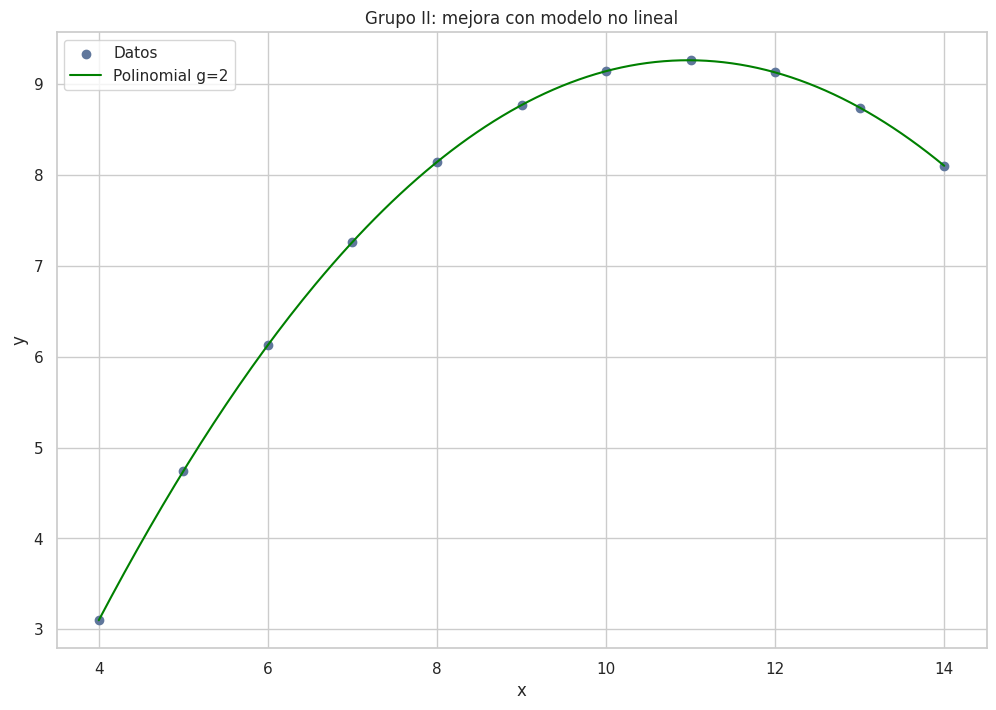

Grupo III — Huber (robusto)
Pendiente: 0.3455508943788064 Intercepto: 4.004660842715984
MSE: 1.6367850472752545 R²: 0.5632720085763956


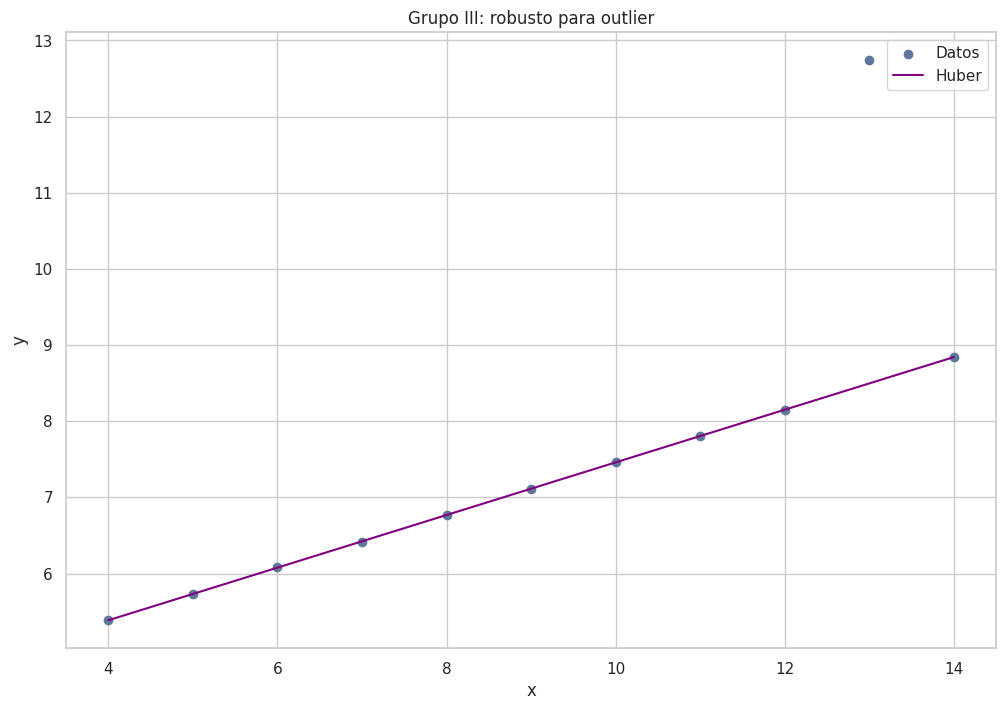

In [34]:
#Mejora ajuste lineal grupo II
from sklearn.preprocessing import PolynomialFeatures
g2 = data[data["dataset"]=="II"]
X = g2[["x"]]; y = g2["y"]

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

lin2 = LinearRegression().fit(X_poly, y)
y_hat = lin2.predict(X_poly)

print("Grupo II — Polinomial grado 2")
print("Coeficientes:", lin2.coef_, "Intercepto:", lin2.intercept_)
print("MSE:", mean_squared_error(y, y_hat), "R²:", r2_score(y, y_hat))
xx = np.linspace(X.min()[0], X.max()[0], 200).reshape(-1,1)
xx_poly = poly.transform(xx)
yy = lin2.predict(xx_poly)

plt.scatter(X, y, label="Datos")
plt.plot(xx, yy, label="Polinomial g=2", color="green")
plt.title("Grupo II: mejora con modelo no lineal")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()


#Mejora ajuste lineal Grupo III
from sklearn.linear_model import HuberRegressor
g3 = data[data["dataset"]=="III"]
X = g3[["x"]].values; y = g3["y"].values

huber = HuberRegressor().fit(X, y)
y_hat = huber.predict(X)

print("Grupo III — Huber (robusto)")
print("Pendiente:", huber.coef_[0], "Intercepto:", huber.intercept_)
print("MSE:", mean_squared_error(y, y_hat), "R²:", r2_score(y, y_hat))

plt.scatter(X, y, label="Datos")
plt.plot(np.sort(X, axis=0), huber.predict(np.sort(X, axis=0)), color="purple", label="Huber")
plt.title("Grupo III: robusto para outlier")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()


Se realizaron mejoras al ajuste lineal del grupo II y III. La razon por la que no se aplico una mejora en el ajuste lineal del grupo I es que este ajuste lineal ya era adecuado, y en el grupo IV, no hay variacion de x en los datos, por lo que la regresion lineal es inadecuada y es necesario recolectar mas datos para ese grupo o implementar algun modelo no parametrico como el que se va a mostrar a continuacion:

Árbol (Grupo IV) -> MSE: 1.249317272727273  R²: 0.6667072568984653


/tmp/ipython-input-2538222426.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx = np.linspace(X.min()[0], X.max()[0], 200).reshape(-1,1)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


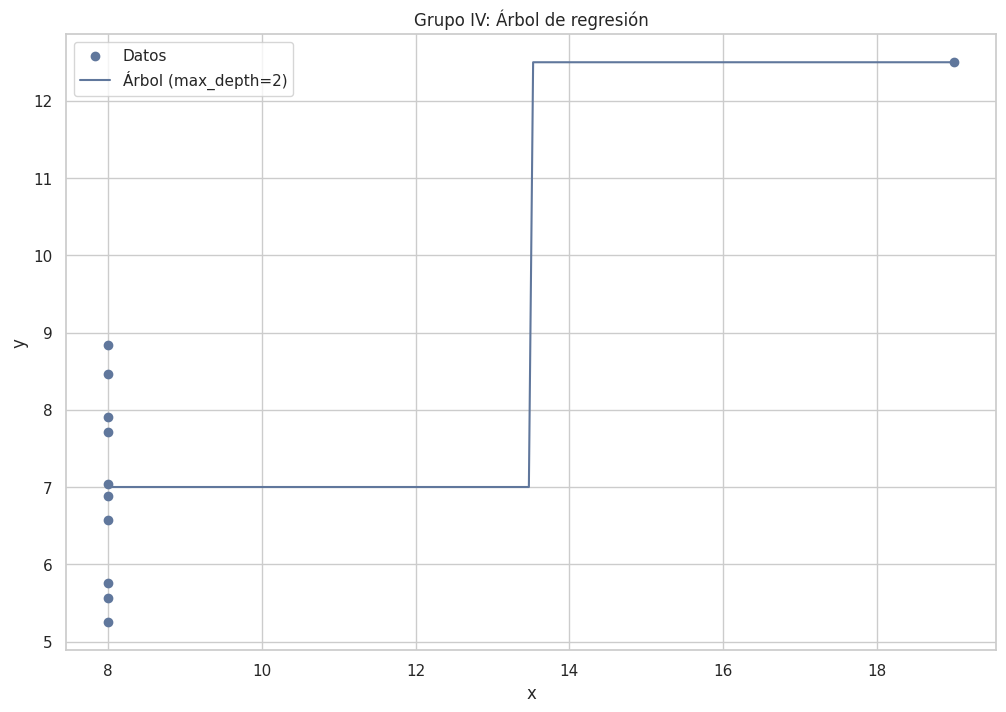

In [35]:
from sklearn.tree import DecisionTreeRegressor

g4 = data[data["dataset"]=="IV"].copy()
X = g4[["x"]]
y = g4["y"]

tree = DecisionTreeRegressor(max_depth=2, random_state=0)
tree.fit(X, y)
y_hat = tree.predict(X)

print("Árbol (Grupo IV) -> MSE:", mean_squared_error(y, y_hat), " R²:", r2_score(y, y_hat))

xx = np.linspace(X.min()[0], X.max()[0], 200).reshape(-1,1)
yy = tree.predict(xx)

plt.scatter(X, y, label="Datos")
plt.plot(xx, yy, label="Árbol (max_depth=2)")
plt.title("Grupo IV: Árbol de regresión")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()